# Desbalanceamento

***

<img src="../imagens/desbalaceamento.jpg" alt="Meme" width="400" />

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classes do modelo
from sklearn.linear_model import LogisticRegression

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


import warnings
warnings.filterwarnings('ignore')

## Análise do conjunto de dados

Abalone -  O Abalone é um molusco gastrópode, herbívoro, que se alimenta de algas marinhas durante aproximadamente 48 meses.

Preveja a idade do abalone a partir de medições físicas. A idade do abalone é determinada cortando a concha através do cone e contando o número de anéis ao microscópio — uma tarefa tediosa e demorada. Outras medições, que são mais fáceis de obter, são usadas para prever a idade.

https://archive.ics.uci.edu/dataset/1/abalone



<img src="https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcRHtXnpfcmMI86SJA49oJ7AvbstTRqKZM_3puNbPoG19GjpYp6O"
alt="Abalone"
width="400" />

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/johnattandouglas/monitoria-ml/main/Datasets/abalone.csv")

### Name / Data Type / Measurement Unit / Description
Rings / integer / -- / +1.5 gives the age in years (TARGET)

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter	/ continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous	 / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

In [3]:
df.head()

,Rings,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,15,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,7,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,9,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,10,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,7,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


### Visualizando a distribuição dos dados por classe

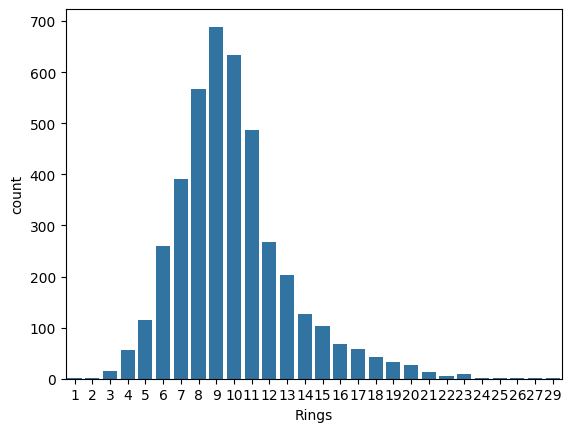

In [4]:
sns.countplot(x="Rings", data=df)
plt.show()

### Separando o conjunto de dados

(2378, 9)
Rings
9     689
10    634
8     568
11    487
Name: count, dtype: int64


<Axes: xlabel='Rings', ylabel='Rings'>

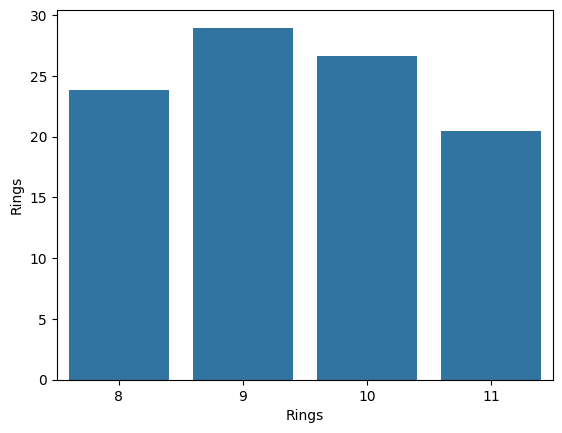

In [5]:
dfFiltrado =  df.loc[(df["Rings"]>7) & (df["Rings"]<12)]

print(dfFiltrado.shape)
print(dfFiltrado["Rings"].value_counts())

#percentual 
sns.barplot(x="Rings", y="Rings",  data=dfFiltrado,  estimator=lambda x: len(x) / len(dfFiltrado) * 100)

In [6]:
X = dfFiltrado.iloc[:,1:8]
y = dfFiltrado.iloc[:,0]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

### Treinando o modelo

In [7]:
model = LogisticRegression()

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           8       0.42      0.47      0.45       171
           9       0.35      0.41      0.38       207
          10       0.32      0.32      0.32       190
          11       0.41      0.27      0.32       146

    accuracy                           0.37       714
   macro avg       0.38      0.37      0.37       714
weighted avg       0.37      0.37      0.37       714



In [8]:
from sklearn.neural_network import MLPClassifier

# Definindo o modelo MLP
model = MLPClassifier(hidden_layer_sizes=(100), activation='relu', random_state=20)

# Treinando o modelo
model.fit(X_train, y_train)

# Predição
y_pred = model.predict(X_test)

# Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           8       0.51      0.43      0.47       171
           9       0.35      0.56      0.43       207
          10       0.32      0.21      0.25       190
          11       0.36      0.29      0.32       146

    accuracy                           0.38       714
   macro avg       0.39      0.37      0.37       714
weighted avg       0.38      0.38      0.37       714



----------------------------------------------------------------
## SMOTE

Vamos usar um pacote que lida com problemas de desbalanceamento de classes em conjuntos de dados, oferecendo técnicas como:

- SMOTE (oversampling): que gera novas amostras sintéticas da classe **minoritária**, em vez de simplesmente duplicar as amostras existentes.
- Undersampling: reduz o número de amostras da classe **majoritária** para balancear o dataset.

Lembre de instalar o `imblearn`:

In [9]:
# !pip install imblearn

In [10]:
from imblearn.over_sampling import SMOTE

### Aplicando o SMOTE

In [11]:
smt = SMOTE(random_state=20, sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X_train, y_train)

Criando um novo dataset com as amostras balanceadas...

(1074, 8)
Rings
11    309
8     265
10    259
9     241
Name: count, dtype: int64


<Axes: xlabel='Rings', ylabel='Rings'>

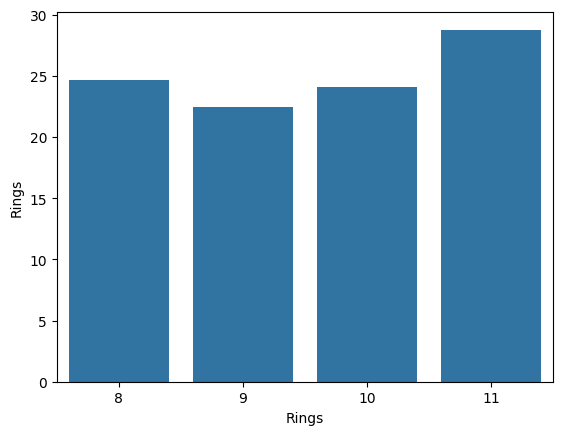

In [12]:
df_SMOTE = pd.DataFrame(X_smt, columns=X_train.columns)
df_SMOTE['Rings'] = y_smt

df_SMOTE_Filtrado = df_SMOTE.loc[(df["Rings"]>7) & (df["Rings"]<12)]

print(df_SMOTE_Filtrado.shape)
print(df_SMOTE_Filtrado["Rings"].value_counts())

#percentual 
sns.barplot(x="Rings", y="Rings",  data=df_SMOTE_Filtrado,  estimator=lambda x: len(x) / len(df_SMOTE_Filtrado) * 100)

### Separando o conjunto de dados

In [13]:
X = df_SMOTE_Filtrado.iloc[:,1:8]
y = df_SMOTE_Filtrado.iloc[:,0]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

### Treinando o modelo

In [14]:
model = LogisticRegression(random_state=20)

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.71      0.57       131
           1       0.50      0.02      0.04       107
           2       0.48      0.68      0.56        85

    accuracy                           0.47       323
   macro avg       0.48      0.47      0.39       323
weighted avg       0.48      0.47      0.39       323



In [15]:
# Definindo o modelo MLP
model = MLPClassifier(hidden_layer_sizes=(100), activation='relu', random_state=20)

#treinando o modelo
model.fit(X_train, y_train)

# Predição
y_pred = model.predict(X_test)

# Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.73      0.58       131
           1       0.00      0.00      0.00       107
           2       0.48      0.71      0.57        85

    accuracy                           0.48       323
   macro avg       0.32      0.48      0.38       323
weighted avg       0.32      0.48      0.38       323

